In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\91934\Downloads\NLP_D1_C6\ML471_S2_Datafile_Concept(in).csv")
df.head()

,Datetime,Consumption,Festivals/Special_events,Power_Consumption_diff
0,1/1/1988,107.5052,6,NaN
1,2/1/1988,105.6720,1,-1.8332
2,3/1/1988,97.4502,1,-8.2218
3,4/1/1988,92.4714,1,-4.9788
4,5/1/1988,90.3151,1,-2.1563


In [3]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [4]:
df.set_index('Datetime', inplace = True)

In [5]:
df.head()

,Consumption,Festivals/Special_events,Power_Consumption_diff
Datetime,,,
1988-01-01,107.5052,6,NaN
1988-02-01,105.6720,1,-1.8332
1988-03-01,97.4502,1,-8.2218
1988-04-01,92.4714,1,-4.9788
1988-05-01,90.3151,1,-2.1563


In [6]:
# Check for missing values
print(df.isnull().sum())
# Remove missing values
df = df.dropna(subset=['Power_Consumption_diff'])

# Recheck for missing values
print(df['Power_Consumption_diff'].isna().any())

Consumption                 0
Festivals/Special_events    0
Power_Consumption_diff      1
dtype: int64
False


Text(0, 0.5, 'ACF Values')

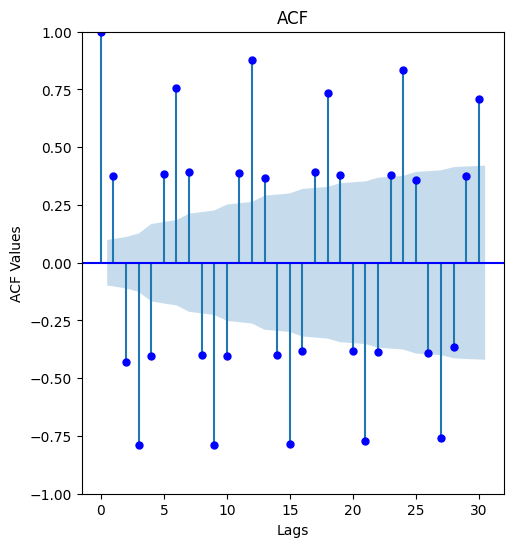

In [7]:
# Plot ACF and PACF to analyze the correlation structure
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Create a figure with 2 subplots for ACF and PACF
plt.figure(figsize=(12, 6))

# Plot ACF using plot_acf
plt.subplot(1, 2, 1)
plot_acf(df['Power_Consumption_diff'], lags=30, ax=plt.gca(), color='blue', alpha=0.05)
plt.title("ACF")
plt.xlabel('Lags')
plt.ylabel('ACF Values')

Text(0, 0.5, 'PACF Values')

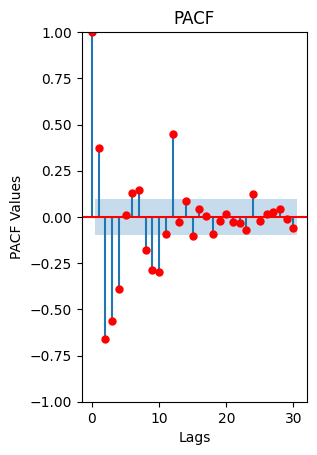

In [8]:
# Plot PACF using plot_pacf
plt.subplot(1, 2, 2)
plot_pacf(df['Power_Consumption_diff'], lags=30, ax=plt.gca(), color='red', alpha=0.05)
plt.title("PACF")
plt.xlabel('Lags')
plt.ylabel('PACF Values')

In [9]:
# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [10]:
# Build MA(1) model based on ACF

from statsmodels.tsa.arima.model import ARIMA
ma_model = ARIMA(train["Power_Consumption_diff"], order=(0, 0, 1))  # (p, d, q) -> MA(1) model
ma_fitted_model = ma_model.fit()
ma_fitted_model.summary()

C:\Users\91934\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91934\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91934\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Power_Consumption_diff   No. Observations:                  316
Model:                     ARIMA(0, 0, 1)   Log Likelihood               -1022.826
Date:                    Thu, 29 Jan 2026   AIC                           2051.652
Time:                            10:21:27   BIC                           2062.920
Sample:                        02-01-1988   HQIC                          2056.153
                             - 05-01-2014                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0694      0.556      0.125      0.901      -1.020       1.159
ma.L1          0.6004      0.046     12.964      0.000       0.510       0.691
sigma2        37.8749      3.003     12.613      0.000      31.989      43.760
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.69   Prob(JB):                         0.94
Heteroskedasticity (H):               2.91   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""